In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv("train.csv")

train

id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0            0   55         165          60       81.0             0.5   
1            1   70         165          65       89.0             0.6   
2            2   20         170          75       81.0             0.4   
3            3   35         180          95      105.0             1.5   
4            4   30         165          60       80.5             1.5   
...        ...  ...         ...         ...        ...             ...   
159251  159251   40         155          45       69.0             1.5   
159252  159252   50         155          75       82.0             1.0   
159253  159253   40         160          50       66.0             1.5   
159254  159254   50         165          75       92.0             1.2   
159255  159255   40         145          45       76.4             1.0   

        eyesight(right)  hearing(left)  hearing(right)  systolic  ...  HDL  \
0                   0.6              1               1       135  ...   40   
1                   0.7              2               2       146  ...   57   
2                   0.5              1               1       118  ...   45   
3                   1.2              1               1       131  ...   38   
4                   1.0              1               1       121  ...   44   
...                 ...            ...             ...       ...  ...  ...   
159251              2.0              1               1       127  ...   72   
159252              1.0              1               1       120  ...   64   
159253              1.0              1               1       114  ...   87   
159254              1.0              1               1       121  ...   55   
159255              1.2              1               1       125  ...   87   

        LDL  hemoglobin  Urine protein  serum creatinine  AST  ALT  Gtp  \
0        75        16.5              1               1.0   22   25   27   
1       126        16.2              1               1.1   27   23   37   
2        93        17.4              1               0.8   27   31   53   
3       102        15.9              1               1.0   20   27   30   
4        93        15.4              1               0.8   19   13   17   
...     ...         ...            ...               ...  ...  ...  ...   
159251  159        14.5              1               0.8   25   26   13   
159252  108        14.5              1               0.6   21   20   18   
159253   93        10.9              1               0.6   15    9   12   
159254   80        14.4              1               1.1   22   17   37   
159255   81        14.0              1               0.8   21   16   17   

        dental caries  smoking  
0                   0        1  
1                   1        0  
2                   0        1  
3                   1        0  
4                   0        1  
...               ...      ...  
159251              0        0  
159252              0        0  
159253              0        0  
159254              0        1  
159255              0        0  

[159256 rows x 24 columns]

In [3]:
train.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

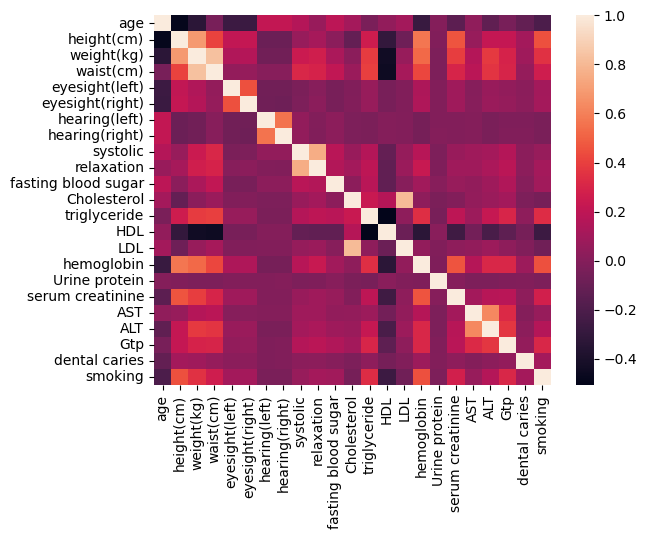

smoking                1.000000
hemoglobin             0.450679
height(cm)             0.447111
weight(kg)             0.351748
triglyceride           0.331975
Gtp                    0.305561
serum creatinine       0.272979
HDL                    0.271186
waist(cm)              0.262715
age                    0.206033
ALT                    0.163016
eyesight(right)        0.109781
relaxation             0.109501
dental caries          0.106636
eyesight(left)         0.100420
fasting blood sugar    0.096534
LDL                    0.072285
AST                    0.059394
systolic               0.058642
Cholesterol            0.051896
hearing(left)          0.038219
hearing(right)         0.036858
Urine protein          0.028548
Name: smoking, dtype: float64

In [4]:
sns.heatmap(train.drop(["id"], axis=1).corr());
plt.show()

corr = train.drop("id",axis=1).corr()
corr["smoking"].abs().sort_values(ascending=False)

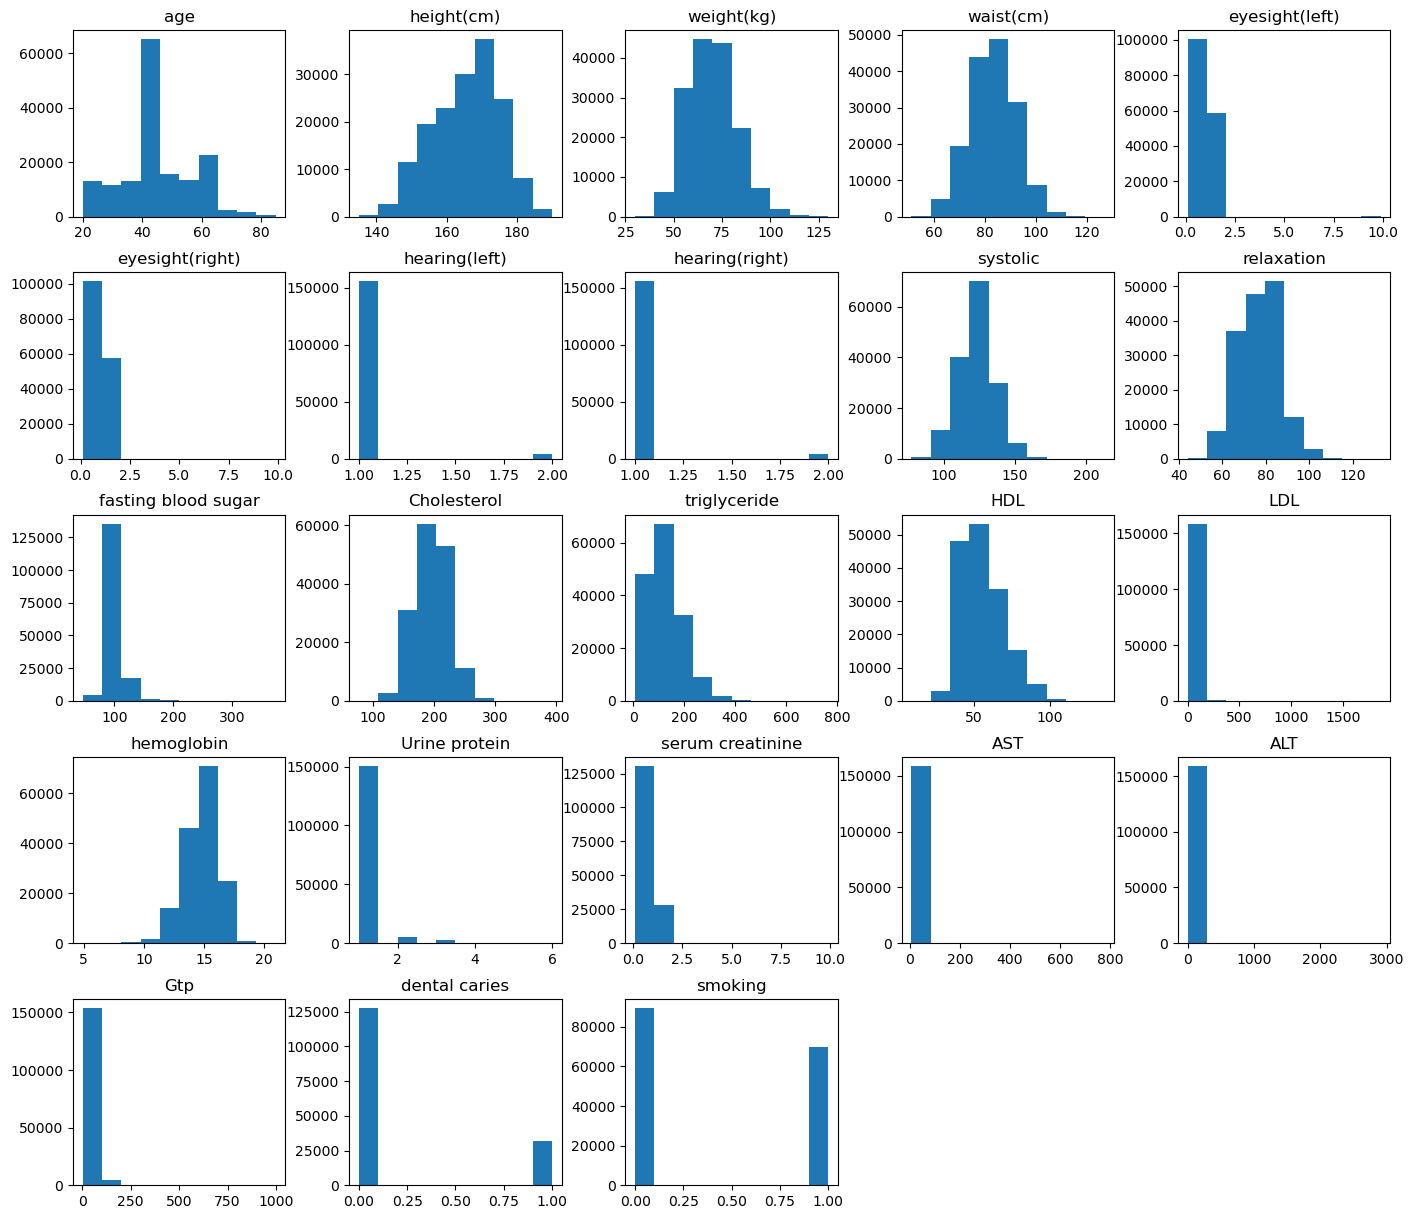

0.4373649972371528

In [5]:
train.drop("id" , axis=1).hist(figsize = (17,15), grid = False);
plt.show()

train["smoking"].mean()

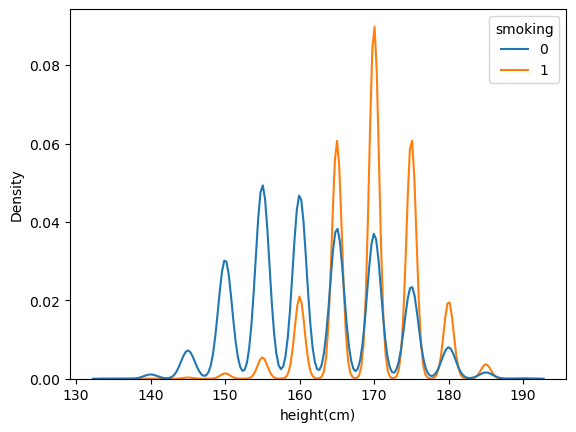

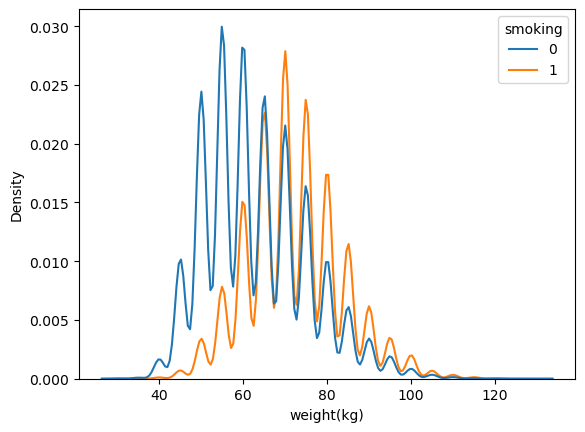

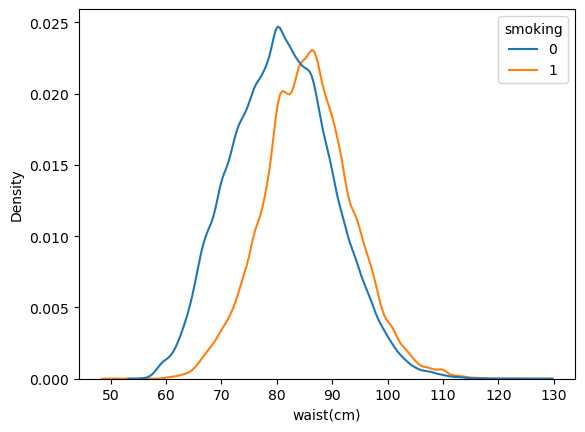

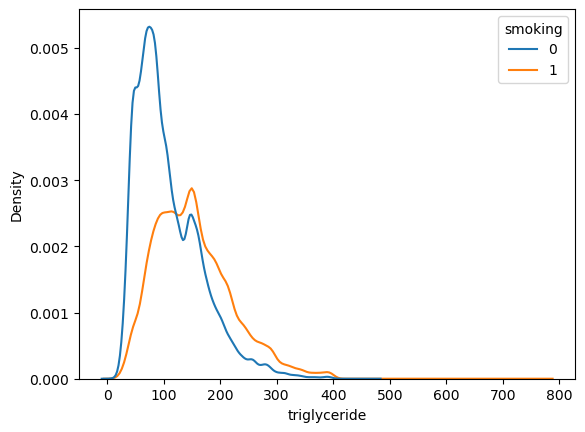

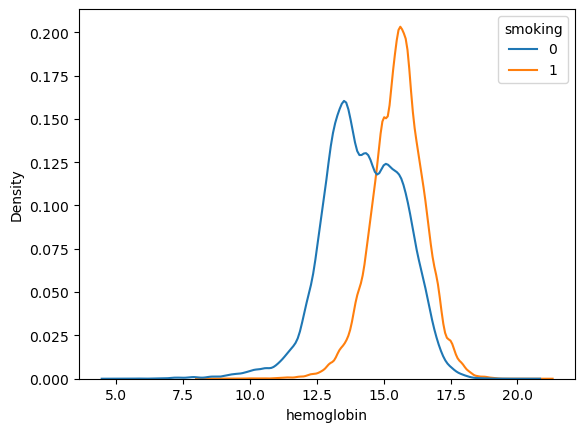

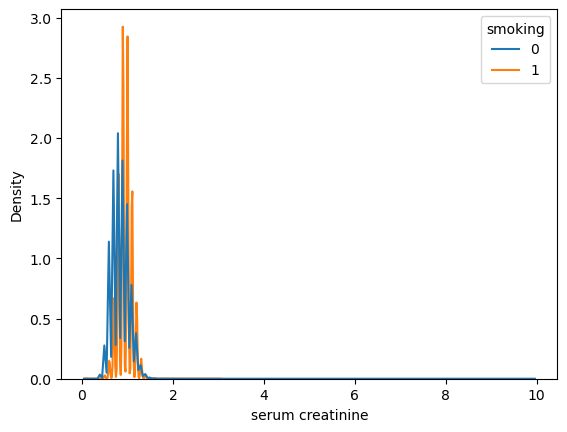

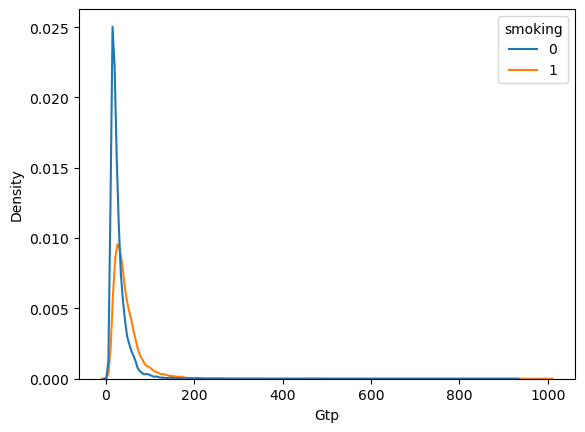

In [33]:
train_cols= []

for col in train.columns:
    if train["smoking"].corr(train[col]) > 0.2 and col != "smoking": 
        train_cols.append(col)
        
for col in train_cols:
    sns.kdeplot(data=train, x=col, hue="smoking")
    plt.show()

In [34]:
(X_train, X_val, y_train, y_val) = train_test_split(train.drop(["id","smoking"], axis = 1), train["smoking"], test_size = 0.25, random_state = 0)

(X_train_selec, X_val_selec) = train_test_split(train[train_cols], test_size = 0.25, random_state = 0)



In [36]:
for i in range(3,19,2):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"{name}: Accuracy = {accuracy:.2f} , {i}")
    
for i in range(3,19,2):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train_selec, y_train)
    y_pred = model.predict(X_val_selec)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"{name}: Accuracy = {accuracy:.2f} , {i}")

Bagging Decision Tree: Accuracy = 0.71 , 3
Bagging Decision Tree: Accuracy = 0.72 , 5
Bagging Decision Tree: Accuracy = 0.73 , 7
Bagging Decision Tree: Accuracy = 0.73 , 9
Bagging Decision Tree: Accuracy = 0.74 , 11
Bagging Decision Tree: Accuracy = 0.74 , 13
Bagging Decision Tree: Accuracy = 0.74 , 15
Bagging Decision Tree: Accuracy = 0.74 , 17
Bagging Decision Tree: Accuracy = 0.71 , 3
Bagging Decision Tree: Accuracy = 0.72 , 5
Bagging Decision Tree: Accuracy = 0.73 , 7
Bagging Decision Tree: Accuracy = 0.73 , 9
Bagging Decision Tree: Accuracy = 0.73 , 11
Bagging Decision Tree: Accuracy = 0.74 , 13
Bagging Decision Tree: Accuracy = 0.74 , 15
Bagging Decision Tree: Accuracy = 0.74 , 17


In [30]:
models = {
    'K-NN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Bagging Decision Tree': BaggingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"{name}: Accuracy = {accuracy:.2f}")

best_model_name = max(models, key=lambda k: accuracy_score(y_val, models[k].predict(X_val)))
print(f"El mejor modelo es {best_model_name}")

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
101732   60         170          85       95.0             1.2   
153249   45         165          70       81.0             1.2   
2735     40         175          70       85.0             1.2   
41074    40         160          55       76.0             1.2   
89024    60         165          70       86.0             0.8   
...     ...         ...         ...        ...             ...   
97639    45         150          55       85.0             0.6   
95939    40         160          60       70.1             1.5   
152315   40         155          50       68.0             0.8   
117952   40         155          70       84.0             0.6   
43567    40         170          75       87.0             1.2   

        eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
101732              0.8              1               1       151          91   
153249              0.9              1               1       130          90   
2735                1.5              1               1       118          74   
41074               1.5              1               1       124          80   
89024               0.7              1               1       134          88   
...                 ...            ...             ...       ...         ...   
97639               0.9              1               1       102          68   
95939               1.2              1               1       109          72   
152315              0.7              1               1        94          68   
117952              0.4              1               1       110          60   
43567               1.2              1               1       124          89   

        ...  triglyceride  HDL  LDL  hemoglobin  Urine protein  \
101732  ...            84   43  129        14.1              1   
153249  ...           203   47  137        15.8              1   
2735    ...            86   59   87        15.1              2   
41074   ...           194   53  126        14.1              1   
89024   ...           129   50  137        15.4              1   
...     ...           ...  ...  ...         ...            ...   
97639   ...            45   61  109        12.0              1   
95939   ...            44   65   93        13.0              1   
152315  ...            65   66  106        11.7              1   
117952  ...            43   71   96        13.4              1   
43567   ...           194   41  116        16.0              1   

        serum creatinine  AST  ALT  Gtp  dental caries  
101732               0.8   24   27   29              0  
153249               0.8   20   21   33              0  
2735                 0.9   19   13   17              1  
41074                0.9   27   37   89              0  
89024                0.6   19   20   79              0  
...                  ...  ...  ...  ...            ...  
97639                1.0   19   14   24              0  
95939                0.9   20   18   19              0  
152315               0.9   23   27   16              1  
117952               0.7   16   15    8              0  
43567                0.9   20   22   52              0  

[119442 rows x 22 columns]